<a href="https://colab.research.google.com/github/mevlt01001/linear-regression-implementation/blob/main/lineer_regresyon.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Lineer Regresyon

Bu notebook, basit bir lineer regresyon modelinin nasıl geliştirileceğini ve gradyan inişi algoritmasıyla nasıl eğitileceğini göstermektedir.

## Libraries

In [ ]:
# Gerekli kütüphaneleri yükleyelim
import numpy as np
import matplotlib.pyplot as plt

# Numpy, veri işleme ve matematiksel işlemler için kullanılacak
# Matplotlib, verilerin görselleştirilmesi için kullanılacak

Bu kütüphaneler Basit bir Lineer Regresyon Modeli oluşturmak için yeterli olacaktır

## Veri Seti

Bu bölümde rastgele bir veri seti oluşturacağız. Bu veri seti, doğrusal (lineer) bir ilişkiye sahip olacak şekilde düzenlenecek. Amaç, bu verileri kullanarak bir doğrusal regresyon modelinin nasıl oluşturulacağını ve eğitileceğini göstermektir.

###Bağımsız değişkenler(X)
-1 ile 1 arasında (1 hariç) 0.001 adım araklıları ile X değerleri oluşturma

In [ ]:
X = np.arange(-1,1,0.001)
print(X)

[-1.    -0.999 -0.998 ...  0.997  0.998  0.999]


### Bağımlı değişkenler (y)
Bağımsız değişkenlerin(**X**) tabii tutlacağı fonksiyon:
**f(x) = 3x + gürültü**

In [ ]:
def function(X):
    # Verilerimize rastgelelik katarak gerçekçi hale getiriyoruz.
    y = 3 * X + np.random.randn(len(X))
    return y

In [ ]:
y = function(X)
print(y)

[-4.36026562 -4.80652163 -2.7929243  ...  3.56764497  2.02049705
  3.0228075 ]


### Veri seti inceleme

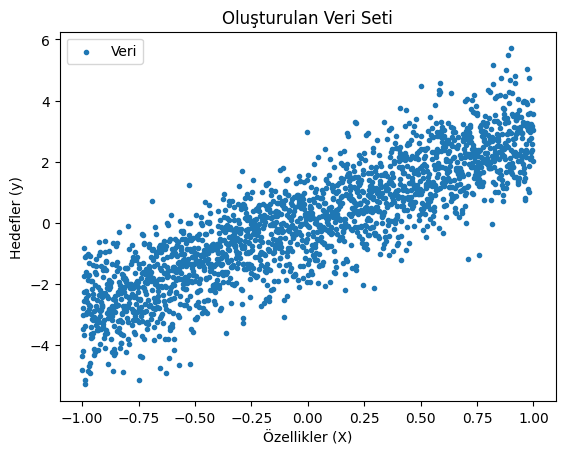

In [ ]:
# Veriyi görselleştirelim
plt.scatter(X, y, label='Veri', marker='.')
plt.xlabel('Özellikler (X)')
plt.ylabel('Hedefler (y)')
plt.legend()
plt.title('Oluşturulan Veri Seti')
plt.show()

## Lineer Regresyon Modeli

In [ ]:
# Lineer Regresyon Modeli Sınıfı Tanımlama
class LinearRegressionModel:
    def __init__(self):
        # Modelin başlangıç parametreleri rastgele atanır
        self.w = np.random.randn(1)  # Eğim
        self.b = np.random.randn(1)  # Sabit terim

    def predict(self, X):
        # Tahmin edilen y değeri
        return X * self.w + self.b

    def update_weights(self, X, y, lr=0.01):
        # Türevler ve ağırlıkların güncellenmesi
        y_pred = self.predict(X)
        dw = np.mean(2 * (y_pred - y) * X)  # w için türev
        db = np.mean(2 * (y_pred - y))      # b için türev

        # Ağırlık güncellemeleri
        self.w -= lr * dw
        self.b -= lr * db

# Modeli oluşturalım
model = LinearRegressionModel()

## Model Eğitimi

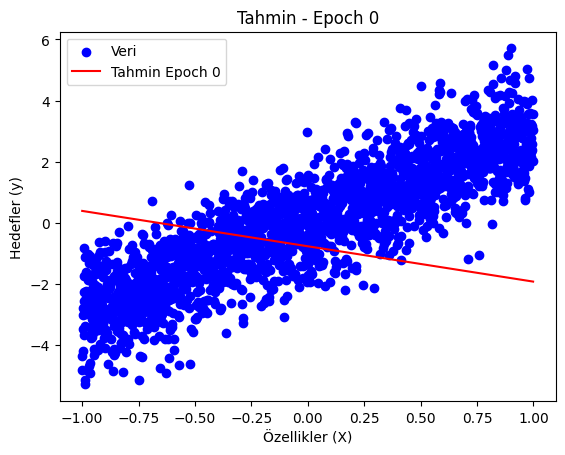

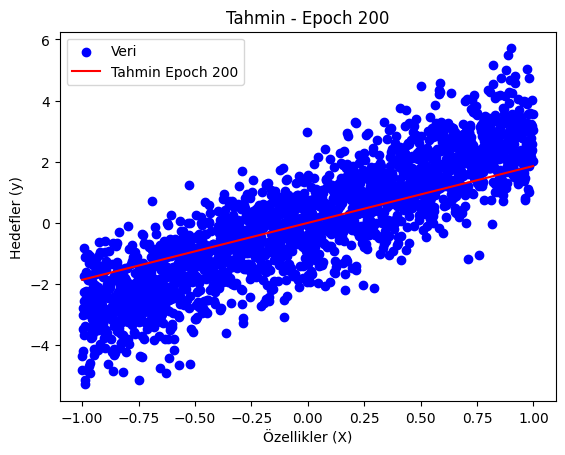

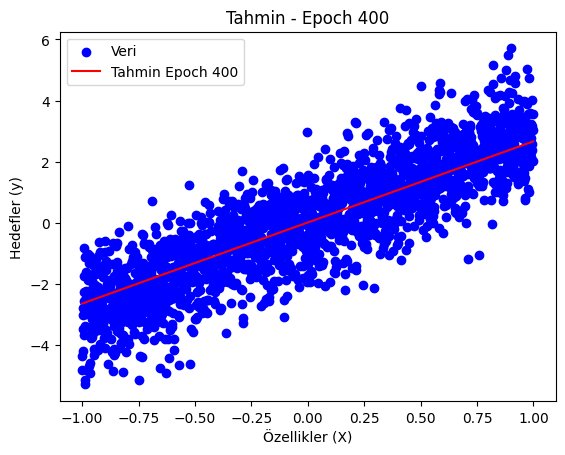

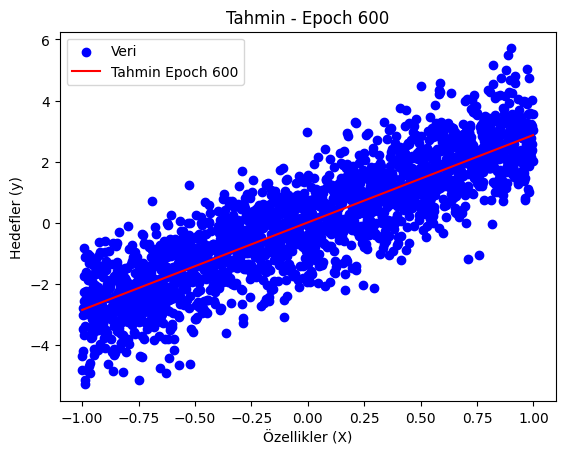

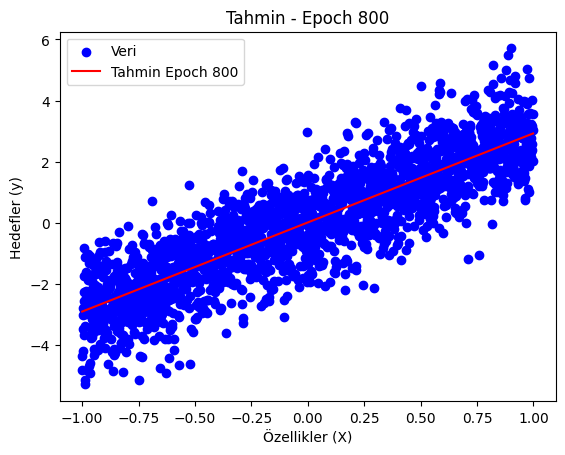

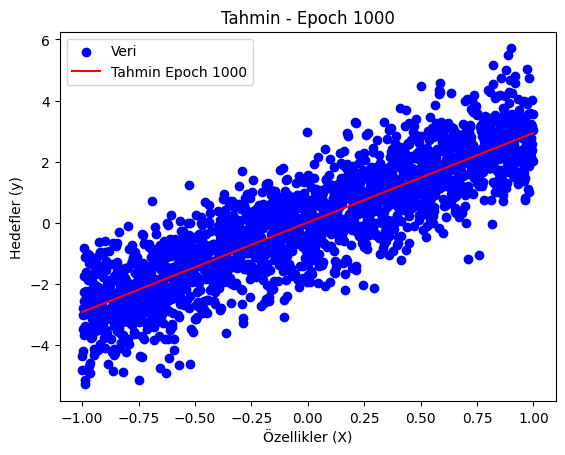

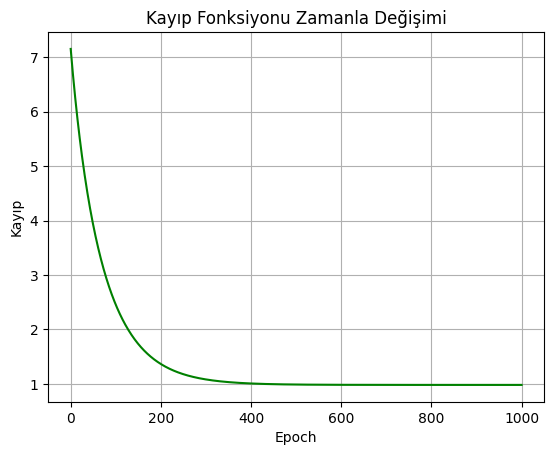

In [ ]:
# Modelin eğitim süreci ve hata fonksiyonunun izlenmesi
epochs = 1000
learning_rate = 0.01
losses = []

for epoch in range(epochs + 1):
    # Ağırlıkları güncelle
    model.update_weights(X, y, lr=learning_rate)
    # Kayıp (hata) hesapla
    loss = np.mean((model.predict(X) - y) ** 2)
    losses.append(loss)

    # Her 200 epoch'ta bir tahmin çizgisini görselleştir
    if epoch % 200 == 0:
        plt.scatter(X, y, color='blue', label='Veri')
        plt.plot(X, model.predict(X), color='red', label=f'Tahmin Epoch {epoch}')
        plt.xlabel('Özellikler (X)')
        plt.ylabel('Hedefler (y)')
        plt.legend()
        plt.title(f'Tahmin - Epoch {epoch}')
        plt.show()

# Kayıp fonksiyonunun zamanla değişimi
plt.plot(range(epochs + 1), losses, color='green')
plt.xlabel('Epoch')
plt.ylabel('Kayıp')
plt.title('Kayıp Fonksiyonu Zamanla Değişimi')
plt.grid(True)
plt.show()

## Kayıp Fonksiyonunun Görselleştirilmesi

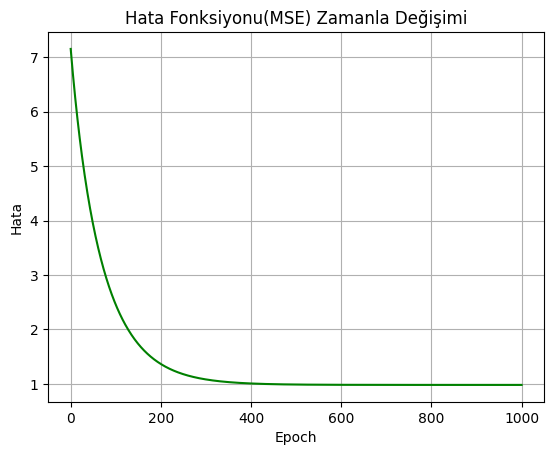

In [ ]:
# Kayıp fonksiyonunun zamanla değişimi
plt.plot(range(epochs + 1), losses, color='green')
plt.xlabel('Epoch')
plt.ylabel('Hata')
plt.title('Hata Fonksiyonu(MSE) Zamanla Değişimi')
plt.grid(True)
plt.show()

## Sonuçlar
Modelimizin veri setine uydurduğu fonksiyonun eğimi ile bağımsız değişkenlerden bağımlı değişkenlere uygulanan fonksiyonun(**f(x) = 3x + gürültü**) eğimi aynı mı?

In [ ]:
print(f"Modelin öğrenme süreci sonrası eğim (w): {model.w}")
print(f"Modelin öğrenme süreci sonrası sabit terim (b): {model.b}")

Modelin öğrenme süreci sonrası eğim (w): [2.92679011]
Modelin öğrenme süreci sonrası sabit terim (b): [0.01479039]


Modelimizin veri setine uydurduğu lineer fonksiyon : **f(X) = 2.926 * X - 0.014**

Bu fonksiyonun eğimi(**2.926**) 3'e oldukça yakın. Bu demek oluyor ki modelimiz başarı ile çalışıyor...

**Bu Jupyter Notebook'ta, basit bir lineer regresyon modeli geliştirdik.**

- Model, rastgele atanmış parametrelerle başlar ve gradyan inişi kullanarak hata fonksiyonunu minimize etmeye çalışır.
- Gradyan inişi, her epoch'ta parametreleri türevler aracılığıyla güncelleyerek, modelin eğimini ve sabit terimini optimum değerlere taşır.
- Kayıp fonksiyonunun zamanla azalması, modelin öğrenme sürecinin başarılı olduğunu ve veriye uygun hale geldiğini gösterir.



Bu temel implementasyon, farklı gradyan inişi yöntemleri, öğrenme oranı optimizasyonu ve veri işleme teknikleri eklenerek geliştirilebilir.
Ayrıca, daha büyük veri setleri veya çoklu özelliklerle çalışmak için bu modelin genişletilmesi de mümkündür.